<a href="https://colab.research.google.com/github/MayureshOP-max/MachineLearning/blob/main/Day1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# # metadata
# print(concrete_compressive_strength.metadata)

# # variable information
# print(concrete_compressive_strength.variables)
print(X)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  
0               1040.0           676.0   28  
1               1055.0           676.0   28  
2                932.

In [2]:
print(y)

      Concrete compressive strength
0                             79.99
1                             61.89
2                             40.27
3                             41.05
4                             44.30
...                             ...
1025                          44.28
1026                          31.18
1027                          23.70
1028                          32.77
1029                          32.40

[1030 rows x 1 columns]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
entire_data = pd.concat([X, y], axis=1)
#Checking Correlation Between Feature and Target
entire_data.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete compressive strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


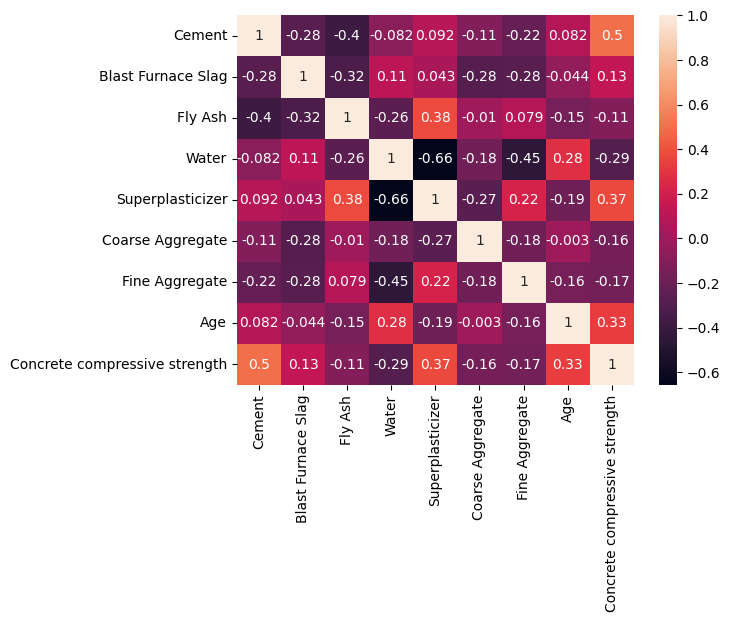

In [5]:
sns.heatmap(entire_data.corr(),annot = True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((721, 8), (721, 1), (309, 8), (309, 1))

In [7]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
print(lr.intercept_,lr.coef_)

[-35.44918333] [[ 0.12726535  0.11257926  0.09835135 -0.13691381  0.23733402  0.02020436
   0.02616505  0.12251105]]


In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.5771752777048793

In [10]:
x = np.array([2,5,7,8,9,10,23,45])
y = np.array([13,15,20,34,36,56,66,78])

sum_x = np.sum(x)
sum_y = np.sum(y)
print(sum_x)
print(sum_y)

sum_xy = np.sum(x*y)
print(sum_xy)

sum_x2 = np.sum(x**2)
print(sum_x2)

109
318
6425
2877


# ***`Boston Dataset`***

In [11]:
df = pd.read_csv("/content/Boston.csv")
df.head()   # medv is y(dependent) and rest is x(independent Variable)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [13]:
y = df["medv"]
X = df.drop("medv",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.7133431144123463

In [15]:
# Correlation between lower status and median value

df['lstat'].corr(df['medv'])   # means the no. of poor increase and price of house decreases

-0.7376627261740151

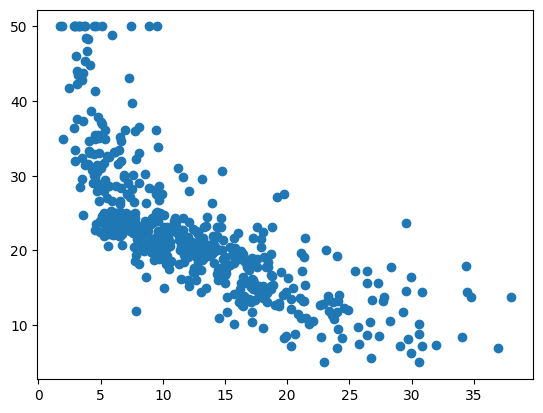

In [16]:
plt.scatter(df["lstat"],df["medv"])
plt.show()

In [17]:
x = df["lstat"]
x_2 = df["lstat"]**2
x_2.corr(df["medv"])


-0.6221787647682886

# ***`Day- 2 `***

In [18]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [34]:
X = df[["lstat"]]
y = df["medv"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.5279301917445975

In [36]:
X_train

,lstat
64,8.05
238,6.36
94,10.59
132,11.12
366,14.00
...,...
401,20.32
343,7.18
192,2.87
387,31.99


# ***Polynomial Selection***

In [40]:
poly = PolynomialFeatures(degree=2,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

0.6431149312301052

# ***TAKING 2 COLUMNS: rad & lstat***

In [58]:
X = df[['lstat','rad']]
y = df['medv']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)
X_train

,lstat,rad
64,8.05,3
238,6.36,6
94,10.59,4
132,11.12,4
366,14.00,24
...,...,...
401,20.32,24
343,7.18,5
192,2.87,5
387,31.99,24


In [60]:
poly = PolynomialFeatures(degree=2,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

0.6833321681968942

In [61]:
poly = PolynomialFeatures(degree=3,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

0.6883404673189584

In [62]:
poly = PolynomialFeatures(degree=4,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

0.6669653344391393

In [64]:
X_poly_tst.columns

Index(['lstat', 'rad', 'lstat^2', 'lstat rad', 'rad^2', 'lstat^3',
       'lstat^2 rad', 'lstat rad^2', 'rad^3', 'lstat^4', 'lstat^3 rad',
       'lstat^2 rad^2', 'lstat rad^3', 'rad^4'],
      dtype='object')

# ***TAKING ALL COLUMNS: rad & lstat***

In [65]:
y = df["medv"]
X = df.drop("medv",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.7133431144123463

In [67]:
poly = PolynomialFeatures(degree=2,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

0.6950286613601392

In [68]:
poly = PolynomialFeatures(degree=3,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

-8442.445263155329

In [69]:
poly = PolynomialFeatures(degree=4,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

-1370.9553198662918

# ***COncrete Strength Dataset***

In [73]:
concrete = pd.read_excel("/content/Concrete_Data.xls")
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [74]:
X=concrete.drop("Concrete compressive strength(MPa, megapascals) ",axis=1)
y=concrete["Concrete compressive strength(MPa, megapascals) "]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [75]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.5770874758663003

In [84]:
poly = PolynomialFeatures(degree=2,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

0.780727904688444

In [82]:
poly = PolynomialFeatures(degree=3,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

#best case

0.8622903272709064

In [80]:
poly = PolynomialFeatures(degree=4,include_bias=False).set_output(transform="pandas")
X_poly_trn = poly.fit_transform(X_train)
X_poly_tst = poly.transform(X_test)
lr.fit(X_poly_trn, y_train)
y_pred = lr.predict(X_poly_tst)
r2_score(y_test,y_pred)

-624.7752723155928

# **USING PIPELINES**

In [112]:
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=3,include_bias=False).set_output(transform="pandas")
lr = LinearRegression()
pipe = Pipeline([("POLY",poly),("LR",lr)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8622903272709064

# ***HOUSING DATASET***

In [117]:
housing = pd.read_csv("/content/Housing.csv")
housing.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [118]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [119]:
X = housing[['driveway']]
y = housing['price']


# **One Hot Encoding (OHE)**

In [109]:
# .get_dummies()  from pandas
dum_X = pd.get_dummies(X, drop_first =True)
lr = LinearRegression()
lr.fit(dum_X,y)
lr.intercept_,lr.coef_

(48555.77922077924, array([22778.11630161]))

In [120]:
housing.groupby('driveway')['price'].mean()

,price
driveway,
no,48555.779221
yes,71333.895522


In [123]:
dum_X = pd.get_dummies(X)
dum_X.drop('driveway_yes',axis=1,inplace=True)
lr = LinearRegression()
lr.fit(dum_X,y)
lr.intercept_,lr.coef_

(71333.89552238806, array([-22778.11630161]))

In [124]:
dum_X = pd.get_dummies(X)
dum_X.drop('driveway_no',axis=1,inplace=True)
lr = LinearRegression()
lr.fit(dum_X,y)
lr.intercept_,lr.coef_

(48555.77922077924, array([22778.11630161]))

# **OHE using sklearn **

In [136]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform="pandas")

In [139]:
ohe.fit_transform(X)
lr = LinearRegression()
lr.fit(dum_X,y)
lr.intercept_,lr.coef_

(48555.77922077924, array([22778.11630161]))

In [144]:
X = housing[['driveway','airco']]  #2 columns
y = housing['price']

In [149]:
ohe = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform="pandas")
dum_X = ohe.fit_transform(X)
lr = LinearRegression()
lr.fit(dum_X,y)
lr.intercept_,lr.coef_

(43790.670320318815, array([19302.6687155, 24460.8923557]))

In [150]:
dum_X.columns

Index(['driveway_yes', 'airco_yes'], dtype='object')

In [155]:
housing['bedrooms'].unique()

array([3, 2, 4, 1, 5, 6])

In [152]:
X = housing[['driveway','airco','bedrooms']]  #3 columns
y = housing['price']

In [157]:
dum_X = pd.get_dummies(X, drop_first=True)
dum_X.columns

Index(['bedrooms', 'driveway_yes', 'airco_yes'], dtype='object')

In [153]:
ohe = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform="pandas")
dum_X = ohe.fit_transform(X)
lr = LinearRegression()
lr.fit(dum_X,y)
lr.intercept_,lr.coef_

(28694.190816010654,
 array([20111.61836798, 20938.60621995,  2650.68368749, 17104.40890437,
        26983.73597376, 36097.25629722, 19644.19081601]))

In [154]:
dum_X.columns

Index(['driveway_yes', 'airco_yes', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6'],
      dtype='object')

# **Column Transformer**

In [161]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector


In [162]:
str_cols = list(housing.columns[housing.dtypes == 'object'])
num_cols = list(housing.columns[housing.dtypes != 'object'])
ohe = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform="pandas")

In [163]:
ct = make_column_transformer(('passthrough', num_cols), (ohe, str_cols),verbose_feature_names_out = False).set_output(transform="pandas")
ct.fit_transform(housing)

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1.0,0.0,1.0,0.0,0.0,0.0
1,38500.0,4000,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,49500.0,3060,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,60500.0,6650,3,1,2,0,1.0,1.0,0.0,0.0,0.0,0.0
4,61000.0,6360,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1.0,1.0,0.0,0.0,1.0,0.0
542,94000.0,6000,3,2,4,0,1.0,0.0,0.0,0.0,1.0,0.0
543,103000.0,6000,3,2,4,1,1.0,1.0,0.0,0.0,1.0,0.0
544,105000.0,6000,3,2,2,1,1.0,1.0,0.0,0.0,1.0,0.0


In [164]:
#USING make_column_selector

In [166]:
ohe = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform="pandas")
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude=object)),
                             (ohe, make_column_selector(dtype_include=object)),
                             verbose_feature_names_out = False).set_output(transform="pandas")
ct.fit_transform(housing)

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1.0,0.0,1.0,0.0,0.0,0.0
1,38500.0,4000,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,49500.0,3060,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,60500.0,6650,3,1,2,0,1.0,1.0,0.0,0.0,0.0,0.0
4,61000.0,6360,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1.0,1.0,0.0,0.0,1.0,0.0
542,94000.0,6000,3,2,4,0,1.0,0.0,0.0,0.0,1.0,0.0
543,103000.0,6000,3,2,4,1,1.0,1.0,0.0,0.0,1.0,0.0
544,105000.0,6000,3,2,2,1,1.0,1.0,0.0,0.0,1.0,0.0


**Using hot encoding with train test split**

In [167]:
ohe = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform="pandas")
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude=object)),
                             (ohe, make_column_selector(dtype_include=object)),
                             verbose_feature_names_out = False).set_output(transform="pandas")

X = housing.drop('price',axis=1)
y = housing['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [168]:
X_ohe_trn = ct.fit_transform(X_train)
X_ohe_tst = ct.transform(X_test)
lr.fit(X_ohe_trn,y_train)
y_pred = lr.predict(X_ohe_tst)
r2_score(y_test,y_pred)

0.6246856191453718

# **Exercise: rewrite this code using pipelines**

In [174]:
from sklearn.pipeline import make_pipeline

X = housing.drop('price',axis=1)
y = housing['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

ohe = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform="pandas")
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude=object)),
                             (ohe, make_column_selector(dtype_include=object)),
                             verbose_feature_names_out = False).set_output(transform="pandas")

pipe = Pipeline([("CT",ct),("LR",lr)])
pipe.fit(X_train,y_train)


Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a27555b0e80>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a27555b05b0>)],
                                   verbose_feature_names_out=False)),
                ('LR', LinearRegression())])

In [176]:
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.6246856191453718

# **Doing this code with polynomial regression**

In [178]:
X = housing.drop('price',axis=1)
y = housing['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

ohe = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform="pandas")
poly = PolynomialFeatures(degree=2,include_bias=False).set_output(transform="pandas")
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude=object)),
                             (ohe, make_column_selector(dtype_include=object)),
                             verbose_feature_names_out = False).set_output(transform="pandas")

pipe = Pipeline([("CT",ct),("POLY",poly),("LR",lr)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2755737160>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2755737b20>)],
                                   verbose_feature_names_out=False)),
                ('POLY', PolynomialFeatures(include_bias=False)),
                ('LR', LinearRegression())])

In [179]:
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.5558314098854267